In [2]:
import pandas as pd
import numpy as np 


In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix


In [4]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Import dataset using raw string literals for file paths
df_sentiment = pd.read_csv(r"C:\Users\dhami\Downloads\twitter_training.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhami\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhami\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhami\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df_sentiment.shape

(74681, 4)

In [6]:
df_sentiment.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [7]:
pd.set_option('display.max_colwidth', None)

df_sentiment

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my Mac is like 6 years behind Nvidia drivers and I have no idea how I did not notice
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice
74679,9200,Nvidia,Positive,Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice


In [8]:
# Count of unique games per GameName
game_counts = df_sentiment['Borderlands'].value_counts()

# Display the counts
print(game_counts)

Borderlands
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)   

In [9]:
# Count of unique games per GameName
game_counts = df_sentiment['Positive'].value_counts()

# Display the counts
print(game_counts)

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [10]:
df_sentiment.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [11]:
df_sentiment.columns = ['EntryID', 'GameName', 'Sentiment', 'Text']

In [12]:
# List of non-game names to be removed
non_game_names = [
    'Microsoft', 'Verizon', 'Facebook', 'johnson & johnson', 'Amazon', 
    'Home Depot', 'Xbox (X series)', 'PlayStation 5 (PS5)', 'Nvidia', 'Google'
]

# Filter the DataFrame to exclude rows with these non-game names
df_sentiment = df_sentiment[~df_sentiment['GameName'].isin(non_game_names)]

In [13]:
# Count of unique games per GameName
game_counts2 = df_sentiment['GameName'].value_counts()

# Display the counts
print(game_counts2)

GameName
TomClancysRainbowSix                 2400
MaddenNFL                            2400
CallOfDuty                           2394
LeagueOfLegends                      2394
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
Battlefield                          2346
TomClancysGhostRecon                 2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
PlayStation5(PS5)                    2310
HomeDepot                            2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)                  2304
Hearthstone                          2298
Borderlands                          2285
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                 

In [15]:
df_sentiment.shape

(60617, 4)

In [16]:
missing_values = df_sentiment.isna().sum()
missing_values

EntryID        0
GameName       0
Sentiment      0
Text         531
dtype: int64

In [17]:
# Remove rows with any missing values
df_sentiment = df_sentiment.dropna()

# Check for missing values again to confirm
missing_values = df_sentiment.isna().sum()
print("Missing values after removal:\n", missing_values)

Missing values after removal:
 EntryID      0
GameName     0
Sentiment    0
Text         0
dtype: int64


In [18]:
# Filter out 'irrelevant' and 'neutral' rows from the same DataFrame
df_sentiment = df_sentiment[~df_sentiment['Sentiment'].isin(['Irrelevant'])]

In [19]:
df_sentiment.shape

(49038, 4)

In [20]:
# Define preprocessing functions
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def remove_non_alphabetic(tokens):
    return [word for word in tokens if word.isalpha()]

def stem_words(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def preprocess_text(text):
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    tokens = remove_non_alphabetic(tokens)
    tokens = stem_words(tokens)
    return tokens

# Apply preprocessing to the 'Text' column
df_sentiment['Processed_Text'] = df_sentiment['Text'].apply(preprocess_text)

In [21]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]"


In [22]:
from collections import Counter
import itertools

# Assuming 'Processed_Text' is a list of words for each row
all_words = list(itertools.chain(*df_sentiment['Processed_Text']))
word_counts = Counter(all_words)

# Filter out words that appear only once
repeating_words = {word: count for word, count in word_counts.items() if count > 1}
sentiment_counts = df_sentiment['Sentiment'].value_counts()

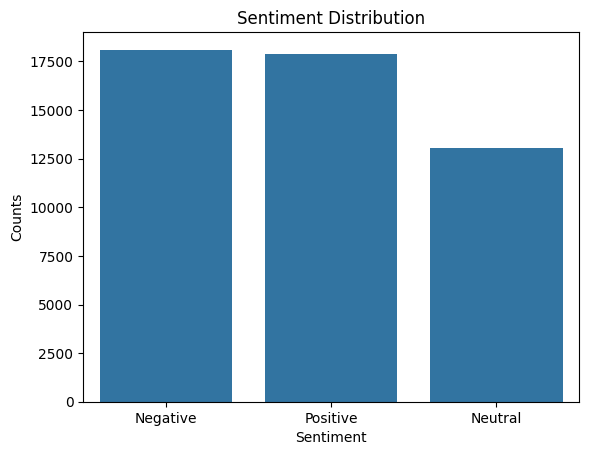

In [23]:
# Assuming 'sentiment_counts' is your Series with sentiment counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()

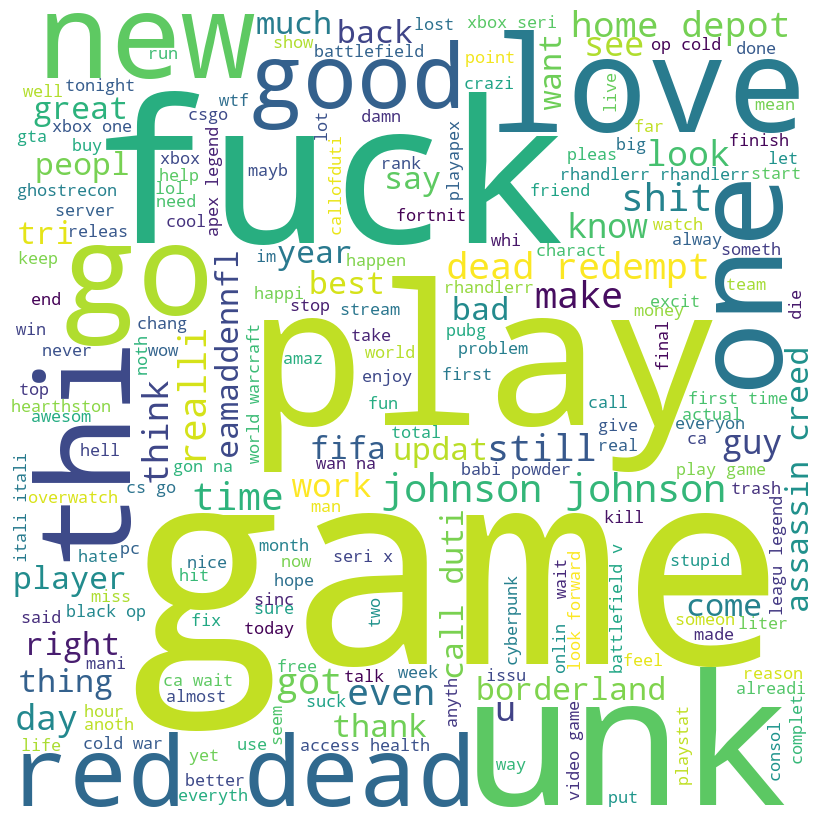

In [24]:
# Assuming 'all_words' is a list of all words in your processed text
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(' '.join(all_words))

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [25]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]"


In [27]:
from collections import defaultdict, Counter

# Initialize dictionaries to store word counts for each sentiment
positive_words = defaultdict(int)
negative_words = defaultdict(int)
neutral_words = defaultdict(int)

# Iterate over the DataFrame and update the counts
for _, row in df_sentiment.iterrows():
    sentiment = row['Sentiment']
    for word in row['Processed_Text']:
        if sentiment == 'Positive':
            positive_words[word] += 1
        elif sentiment == 'Negative':
            negative_words[word] += 1
        elif sentiment == 'Neutral':
            neutral_words[word] += 1

# Now, find the most common words for each sentiment
most_common_positive = Counter(positive_words).most_common(30)
most_common_negative = Counter(negative_words).most_common(30)
most_common_neutral = Counter(neutral_words).most_common(30)

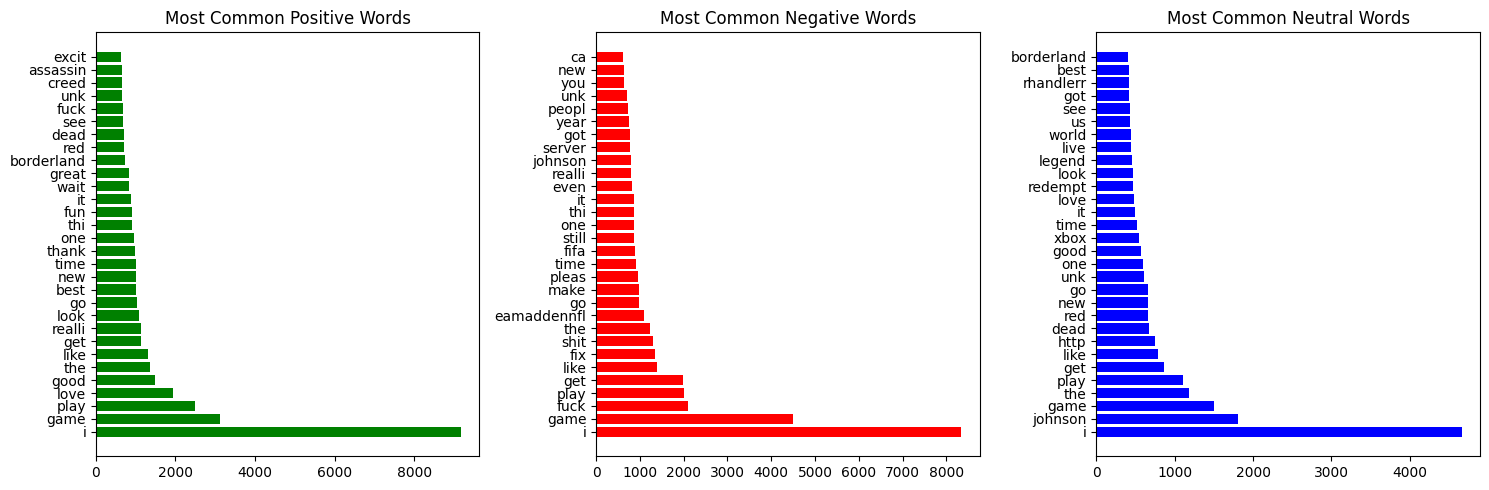

In [29]:
import matplotlib.pyplot as plt

# Function to plot a horizontal bar chart for sentiment words
def plot_most_common_words(most_common, title, ax, color):
    words, counts = zip(*most_common)
    ax.barh(words, counts, color=color)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each sentiment
plot_most_common_words(most_common_positive, 'Most Common Positive Words', axes[0], 'green')
plot_most_common_words(most_common_negative, 'Most Common Negative Words', axes[1], 'red')
plot_most_common_words(most_common_neutral, 'Most Common Neutral Words', axes[2], 'blue')
plt.tight_layout()
plt.show()

In [30]:
# Printing the two most common words for each sentiment
print("Two Most Common Positive Words:", most_common_positive[:2])
print("Two Most Common Negative Words:", most_common_negative[:2])
print("Two Most Common Neutral Words:", most_common_neutral[:2])

Two Most Common Positive Words: [('i', 9183), ('game', 3113)]
Two Most Common Negative Words: [('i', 8347), ('game', 4492)]
Two Most Common Neutral Words: [('i', 4664), ('johnson', 1807)]
